## Interpolación polinomial Netwon-Lagrange

In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Se define la función lagrange, se pasan los puntos en x, los puntos en y y una lusta de ceros para guardar las aproximaciones
def lagrange(x,y,xx):
    x_len = len(x)
    if len(y) != n:
        print('x and y must be same length')
    aux = 0
    for i in range(x_len):
        product = y[i]
        for j in range(x_len):
            if i != j:
                product = product*(xx - x[j])/(x[i] - x[j]);
        aux += product
    return aux

In [3]:
# Se define la función lagrange, se pasan los puntos en x, los puntos en y y una lusta de ceros para guardar las aproximaciones
def newton(x,y,xx):
    x_len = len(x)
    if len(y) != x_len:
        print('x and y must be same length')
    b = np.zeros([x_len,x_len])
    b[:,0] = y[:]
    for j in range(1,x_len):
        for i in range(x_len-j):
            b[i,j] = (b[i+1,j-1]-b[i,j-1])/(x[i+j]-x[i]) 
    xt = 1
    yint = b[0,0]

    for j in range (x_len-1):
        xt = xt*(xx-x[j]);
        yint = yint+b[0,j+1]*xt
    return yint

In [4]:
x=np.array([0.9, 1.3, 1.85, 2.1, 2.6, 3.0, 3.9, 4.4, 4.9, 5.0, 6.0, 7.0, 8.0,9.2, 10.5, 11.3, 11.6, 12.0, 12.6, 13.0, 13.3]);
f_x=np.array([1.3, 1.5, 1.85, 2.1, 2.6, 2.7, 2.4, 2.15, 2.05, 1.1, 1.25, 1.3, 1.25, 1.5, 1.4, 1.9, 0.7, 2.6, 1.5, 1.4, 0.25]);

n=len(x)
xres= np.arange(x[0],x[n-1]+0.05,0.05)
xlon=len(xres)
xres = np.expand_dims(xres,0)
yres=np.zeros(xlon)
yres = np.expand_dims(yres,0)

yresNew=np.zeros((xlon))
yresLag=np.zeros((xlon))

In [5]:
for s in range(xlon):
    yresLag[s]=lagrange(x,f_x,xres[0,s])
    yresNew[s]=newton(x,f_x,xres[0,s])

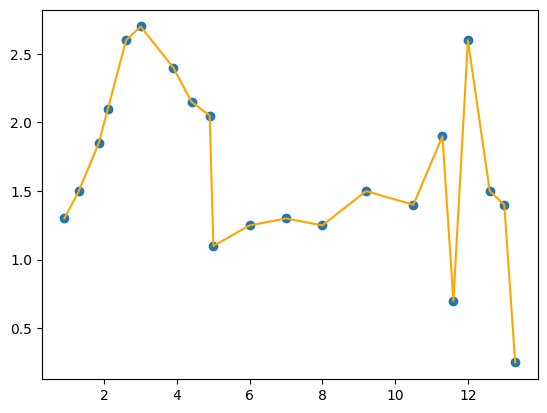

In [6]:
plt.figure()
plt.plot(x,f_x,'o',label='Puntos dados');
plt.plot(x,f_x,'orange',label='Unión puntos dados');

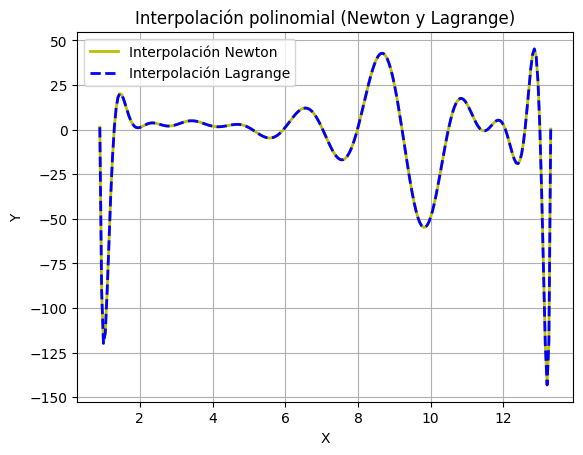

In [7]:
yresNew = np.expand_dims(yresNew,0)
yresLag = np.expand_dims(yresNew,0)

plt.plot(xres[0],yresNew[0],'y',label='Interpolación Newton',linewidth=2);
plt.plot(xres[0],yresLag[0,0],'b--',label='Interpolación Lagrange',linewidth=2);
plt.legend(fontsize=10)
plt.title('Interpolación polinomial (Newton y Lagrange)')
plt.xlabel('X')
plt.grid(True)
plt.ylabel('Y')
plt.show()